# Figure showing pre-processing steps for the SA.

**Notebook for CD4 data figure**

Sequential method pre-processing. The figure contains the following panels:

* Panel A -- heatmap: MFI for the different clusters
* Panel B -- UMAP showing the clusters
* Panel C -- cell density UMAP, split per day to show time evolution
* Panel D -- frequency timecourses

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import json
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib

import scdynsys.plots as plots
import scdynsys.utilities as utils

tex_fonts = {
    "font.family" : "Helvetica",
    'pdf.fonttype' : 42,
}

plt.rcParams.update(tex_fonts)

tabcolors =  [matplotlib.colors.to_hex(plt.cm.tab20(i/20)) for i in range(20)]
tabcolors = [tabcolors[2*i] for i in range(10)] + [tabcolors[2*i+1] for i in range(10)]

### Create a figure object and grid

We will construct the figure using multiple cells in the notebook.

In [2]:
gs = GridSpec(6, 8) ## CD4 has 11 clusters
fig = plt.figure(figsize=(14, 12)) ## CD4

labx, laby = -0.05, 1.05

fig.subplots_adjust(wspace=0.3, hspace=0.5)

<Figure size 1400x1200 with 0 Axes>

### Import data to construc the figure

This data is compiled in notebook `SequentialApproachClusCD4.ipynb`

We also define descriptive names for the clusters. These names are also used in SI figures (e.g. the IA-SA confusion matrix) 
and therefore we save the names to a pickle.

In [3]:
data_file = "../results/data_SA_clustering_CD4.pkl"

with open(data_file, "rb") as f:
    seq_data_dict = pickle.load(f)
    
celltype_per_sample = seq_data_dict["celltypes"]
celltype_colors = tabcolors
celltype_names = seq_data_dict["celltype_names"]
umap_embedding = seq_data_dict["umap_coords"]
celltype_color_dict = dict(zip(celltype_names, celltype_colors))
sel_markers = seq_data_dict["markers"]
MFI = seq_data_dict["MFI"]
mouse_day_dict = seq_data_dict["mouse_day_dict"]
freq_df = seq_data_dict["freq_df"]
sample_day = seq_data_dict["sample_day"]
celltype_entropy = seq_data_dict["entropy"]
umap_coords_totpos = seq_data_dict["umap_coords_tetpos"]
tet_dens = seq_data_dict["tet_dens"]


fancy_names = {
    "CD69+ CD49a+ TRM" : "CD69$^\\text{hi}$ CD49a$^\\text{hi}$ TRM",
    "CD69+ CD49a- TRM" : "CD69$^\\text{hi}$ CD49a$^\\text{lo}$ TRM",
    "CD69- CD49a+ TRM" : "CD69$^\\text{lo}$ CD49a$^\\text{hi}$ TRM",
    "CD69- CD49a- TRM" : "CD69$^\\text{lo}$ CD49a$^\\text{lo}$ TRM",
    "CD69+ Bcl2+ TRM"  : "Bcl2$^\\text{hi}$ TRM",
    "Bcl2+ TEM"        : "Bcl2$^\\text{hi}$ TEM",
    "TEM"              : "Bcl2$^\\text{lo}$ TEM",
    "CD103+ TRM"       : "CD103$^\\text{hi}$ TRM",
    "FR4+ TEM"         : "Tfh",
    "TCM"              : "TCM",
    "Teff"             : "KLRG1$^\\text{hi}$ TRM"
}

with open("../results/fancy_names_SA_CD4.pkl", 'wb') as f:
    pickle.dump(fancy_names, f)

### Panel A contains the heatmap 

with MFI for each T cell population.

In [4]:
# heatmap of marker expression per population

ax = fig.add_subplot(gs[:2, :3])

ax_ins = ax.inset_axes([0.28, 0.2, 0.72, 0.8], transform=ax.transAxes)
ax.axis('off')

fancy_celltype_names = [fancy_names[name] for name in celltype_names]
plots.simple_heatmap(ax_ins, MFI[::-1,:], sel_markers, fancy_celltype_names[::-1])

for i, tick in enumerate(ax_ins.get_yticklabels()):
    tick.set_rotation(45)
    tick.set_color(celltype_color_dict[celltype_names[::-1][i]])

ax.text(labx, laby, "A", fontsize='xx-large', transform=ax.transAxes)

Text(-0.05, 1.05, 'A')

### Panel B shows a UMAP of the data 
with the location of the clusters. We manually set locations of labels.

In [5]:
# UMAP with clusters

ax = fig.add_subplot(gs[:2, 4:7])

celltype_color_per_sample = np.array([celltype_color_dict[c] for c in celltype_per_sample])
rperm = np.random.choice((n := umap_embedding.shape[0]), n, replace=False)
ax.scatter(
    umap_embedding[rperm,0], umap_embedding[rperm,1], 
    c=celltype_color_per_sample[rperm], s=0.1, rasterized=True,
    linewidths=0
)

# make sure the UMAP is "square"
m, M = np.min(umap_embedding, axis=0), np.max(umap_embedding, axis=0)
asp = (M[0] - m[0]) / (M[1] - m[1])
ax.set_aspect(asp, adjustable="datalim")

# find means of clusters for annotation

clus_means = utils.get_mean_per_cluster(umap_embedding, celltype_per_sample, celltype_names)


# positions for the CD4 sub-population labels
position = {
    "CD69- CD49a- TRM" : (0.0, 12),
    "CD69- CD49a+ TRM" : (6, 14),
    "Bcl2+ TEM"        : (5.9, -3.4),
    "CD103+ TRM"       : (13,  -2),
    "FR4+ TEM"         : (-2,  2.0),
    "CD69+ CD49a+ TRM" :  (13, 12),
    "TEM"              :  (-1,  5),
}

for z, name in zip(clus_means, celltype_names):
    fancy_name = fancy_names[name]
    pos = position.get(name, z)
    ap = dict(arrowstyle="->") if name in position else None
    ax.annotate(
        fancy_name, xy=z, xytext = pos, 
        va='center', ha='center',
        fontsize='small',
        arrowprops=ap
    )
    print(name, pos)

ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_xticks([])
ax.set_yticks([])


ax.text(labx, laby, "B", fontsize='xx-large', transform=ax.transAxes);

CD69+ CD49a+ TRM (13, 12)
CD69+ CD49a- TRM [8.18891907 5.92973042]
CD69- CD49a+ TRM (6, 14)
CD69- CD49a- TRM (0.0, 12)
CD69+ Bcl2+ TRM [10.45150471  2.85067463]
CD103+ TRM (13, -2)
TEM (-1, 5)
Bcl2+ TEM (5.9, -3.4)
FR4+ TEM (-2, 2.0)
TCM [-1.14568698 -0.29720959]
Teff [-2.56743002  7.0931406 ]


### Panel C has 8 sub-panels showing a timeseries of UMAPs

The UMAPs show the density of cells

In [6]:
# timeseries density UMAPs

axs = []

uday = np.sort(np.unique(sample_day))

ax = None
for i in range(len(uday)):
    ax = fig.add_subplot(gs[2, i], sharex=ax, sharey=ax)
    axs.append(ax)
    
    
for i, d in enumerate(uday):
    select = sample_day == d
    zs = umap_embedding[select, :]
    ax = axs[i]
    
    ran_idxs = np.random.choice(range(zs.shape[0]), 1000)
    umap_density = sts.gaussian_kde(zs[ran_idxs,:].T)(zs.T)

    ax.scatter(
        zs[:,0], zs[:,1], 
        c=umap_density, s=0.1, rasterized=True, linewidths=0
    )
    
    ax.set_xlabel("UMAP 1")
    if i == 0:
        ax.set_ylabel("UMAP 2")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{d} DPI")
    
Ax = fig.add_subplot(gs[2, :4])

Ax.axis('off')
Ax.text(labx, laby, "C", fontsize='xx-large', transform=Ax.transAxes)

Text(-0.05, 1.05, 'C')

### Panel D has subpanels for each cluster

For each cluster we show the timeseries of the relative frequency.

In [7]:
axs = []
ax = None
num_cols = 4
for i in range(len(celltype_names)):
    a, b = divmod(i, num_cols)
    ax = fig.add_subplot(gs[3+a, 2*b:2*(b+1)], sharex=ax, sharey=ax)
    axs.append(ax)
    
## plot cluster freqs
sorted_mice = sorted(list(freq_df), key=lambda x: (mouse_day_dict[x], str(x)))
days = [mouse_day_dict[m] for m in sorted_mice]
for i, ct in enumerate(celltype_names):
    fancy_name = fancy_names[ct]
    col = celltype_color_dict[ct]
    ax = axs[i]
    qs = freq_df[sorted_mice].loc[ct]
    ax.scatter(days, qs, s=10, color=col)
    udays = np.unique(days)
    grouped_qs = [[q for t, q in zip(days, qs) if t == d] for d in udays]
    mean_qs = [sts.gmean(q) for q in grouped_qs]
    ax.plot(udays, mean_qs, color=col)
    ax.set_title(fancy_name, color=col)
    ax.set_yscale('log')
    xticks = [14, 28, 42, 56]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    # remove yticks
    a, b = divmod(i, num_cols)
    if b > 0:
        for tl in ax.axes.get_yticklabels():
            tl.set_visible(False)
    else:
        ax.set_ylabel("Fraction of cells")
    if a == len(celltype_names) // num_cols:
        ax.set_xlabel("DPI")

    
Ax = fig.add_subplot(gs[3, :4])

Ax.axis('off')
Ax.text(labx, laby, "D", fontsize='xx-large', transform=Ax.transAxes)

Text(-0.05, 1.05, 'D')

### Now we can have a look at the figure

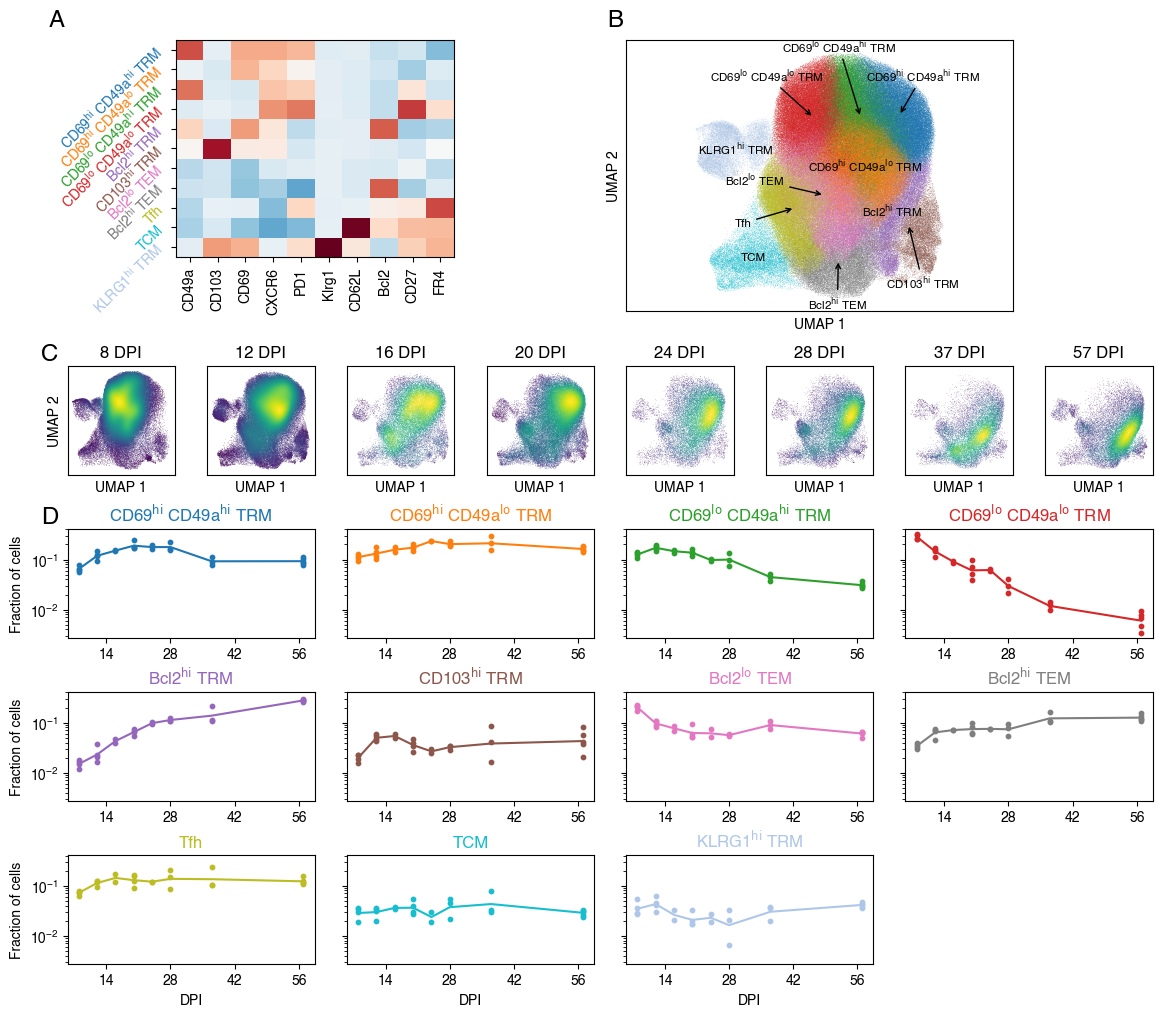

In [8]:
fig

In [9]:
#fig.savefig("../results/FigureSAClusteringCD4.pdf", bbox_inches='tight')